## 목표
- 타이타닉 데이터를 학습해서 생존자/사망자를 예측해보자
- 머신러닝의 전체 과정을 진행해보자.

In [240]:
# 이미지를 넣는 라이브러리 
from IPython.display import Image

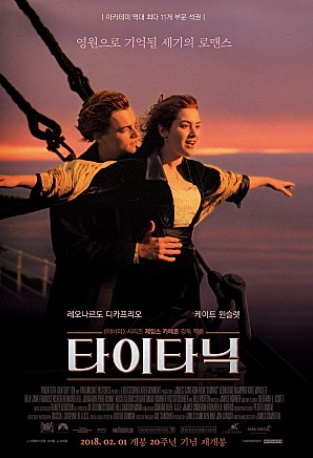

In [241]:
Image('https://www.gukjenews.com/news/photo/201912/1212183_991659_1921.jpg')

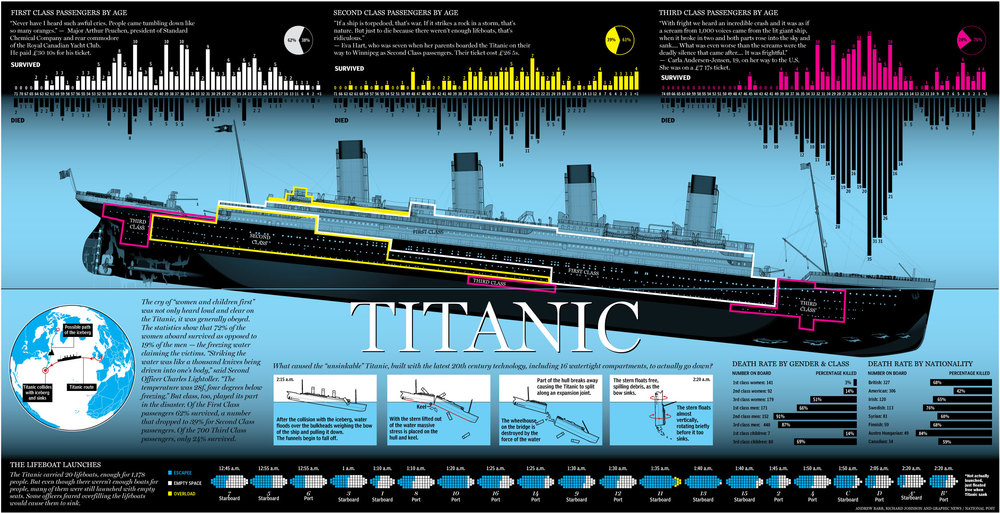

In [242]:
Image('https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg')

### 머신러닝 과정
- 문제정의
- 데이터 수집
- 데이터 전처리
- 탐색적 데이터 분석(EDA)
- 모델 선택 및 학습
- 모델 평가

### 1. 문제정의
- 생존자/ 사망자를 예측
- Kaggle 경진대회에서 높은 순위를 차지 
- 데이터를 토대로 생존율이 높은 승객, 생존율이 낮은 승객은 누구인지 판단

### 데이터 수집 
- Kaggle 사이트로부터 train, test 다운로드

- 타이타닉 train데이터와 test 데이터를 각각 변수 train, test에 저장하세요
(단, 인덱스는 PassengerId를 사용할 것) 

In [243]:
import pandas as pd

In [244]:
train = pd.read_csv('train.csv', index_col = 'PassengerId')
test = pd.read_csv('test.csv', index_col = 'PassengerId')

### 데이터 조회하기 

In [245]:
# head() : 최상단 데이터 확인하는 메서드
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [246]:
# tail() : 최하단 데이터 확인하는 메서드
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 컬럼(column) 설명
- PassengerId : 탑승객Id
- Survived : 생존여부(0 = 사망, 1 = 생존)
- Pclass : 티켓 클래스(1등급, 2등급, 3등급)
- Name : 이름
- Sex : 성별 (male = 남성, female = 여성)
- Age : 나이
- Sibsp : 형제/배우자 수
- Parch : 부모/자녀 수
- Ticket : 티켓 번호
- Fare : 요금
- Cabin : 객실번호
- Embarked : 승선항 C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼

In [247]:
# 데이터의 크기 확인하기 
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [248]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [249]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

### 연습문제
- Embarked는 승객의 탑승항구를 나타내는 컬럼. 탑승 항구별 승객 데이터 분포를 확인

In [250]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

문제2

- 나이가 20살이상 40살 미만인 승객
- Pclass가 1등급 혹은 2등급인 승객
- 열(Column)은 Survived, Pcalss, Age, Fare만 나오게 출력
- 상위 10개의 데이터만 출력

In [251]:
# 나이가 20살이상 40살 미만인 승객
# train[train['Age'] >= 20]
condition1 = (train['Age'] >= 20) & (train['Age'] < 40) 

# Pcalss가 1등급 혹은 2등급인 승객
condition2 = (train['Pclass'] == 1) | (train['Pclass'] == 2)

train.loc[condition1 & condition2 , ['Survived','Pclass','Age','Fare']].head(10)

,Survived,Pclass,Age,Fare
PassengerId,,,,
2,1,1,38.0,71.2833
4,1,1,35.0,53.1000
21,0,2,35.0,26.0000
22,1,2,34.0,13.0000
24,1,1,28.0,35.5000
35,0,1,28.0,82.1708
42,0,2,27.0,21.0000
54,1,2,29.0,26.0000
57,1,2,21.0,10.5000


문제3

- 나이가 30살 이상 남자 승객 조건 필터링
- Fare를 많이 낸 순서로 내림차순 정렬
- 상위 5개를 출력

In [252]:
condition1 = train['Age'] >= 30
condition2 = train['Sex'] == 'male'

train[condition1 & condition2].sort_values(by = 'Fare', ascending = False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S


In [253]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [254]:
train.sort_values(by='Fare',ascending = False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [255]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [256]:
(condition1 & condition2).head()

PassengerId
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [257]:
condition1 & condition2

PassengerId
1      False
2      False
3      False
4      False
5       True
       ...  
887    False
888    False
889    False
890    False
891     True
Length: 891, dtype: bool

In [258]:
train[condition1 & condition2].sort_values(by='Fare',ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S


In [259]:
train.sort_values(by='Fare',ascending = False)[condition1 & condition2].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S


## 데이터 전처리 및 데이터 탐색

In [260]:
# 데이터의 갯수, 데이터 타입을 확인 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [261]:
# 타입 변환
# astype
# Pclass의 타입 int64 -> int32로 변환  
# 메모리 공간을 아낄 수 있음
train['Pclass'] = train['Pclass'].astype('int32')
train['Pclass']

PassengerId
1      3
2      1
3      3
4      1
5      3
      ..
887    2
888    1
889    3
890    1
891    3
Name: Pclass, Length: 891, dtype: int32

In [262]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int32  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 112.3+ KB


In [263]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [264]:
# 각 컬럼에 대한 기술통계 확인
# describe() : 수치형 컬럼의 통계를 기본으로 한다. 
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [265]:
train.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [266]:
# 남성과 여성의 데이터 수를 확인
# value_counts() : column별 값의 분포를 확인할 때 사용 
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### 결측치
- 결측치는 비어있는 데이터를 의미한다. 
1. 결측치데이터 확인
2. 결측치아닌 데이터 확인
3. 결측 데이터 채우기 
4. 결측 데이터 제거하기

In [267]:
# 결측치 확인 - isnull(), isna()
# 컬럼별 결측치의 갯수를 확인하기 위해서는 sum()함수를 붙여주면 된다.
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Age 결측치 채우기
- 다른 컬럼간의 상관관계를 이용해 결측치를 채워보자.
- Age와 다른 컬럼간의 상관관계를 알아보자

In [268]:
# 경고메시지 무시하기 
import warnings
warnings.filterwarnings(action = 'ignore')

In [269]:
# corr() 메서드 : 각 컬럼간의 상관관계를 반환하는 메서드
# +1에 가까울수록 양의 상관관계가 높음
# -1에 가까울수록 음의 상관관계가 높음 
# 0에 가까울수록 상관성이 많이 없음
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Pclass가 생존에 가장 높은 상관관계를 갖는다. 
- 생존에 관련이 많을 것 같은 성별을 그룹핑에 활용해보자.

In [270]:
# 피봇테이블 : 그룹핑할 때 사용 
pt1 = train.pivot_table(values = 'Age',#데이터로 사용할 열
                       index = ['Pclass','Sex'], # 행 위치에 들어갈 열
                       aggfunc = 'mean') # 데이터 집계함수
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [271]:
# Pclass가 1이고 여성인 사람의 평균나이
pt1.loc[1, 'female']

Age    34.611765
Name: (1, female), dtype: float64

In [272]:
# Pclass가 3인 남성의 평균나이
pt1.loc[3, 'male']

Age    26.507589
Name: (3, male), dtype: float64

In [273]:
import numpy as np

In [274]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [275]:
train.iloc[5]['Age']

nan

In [276]:
train.iloc[888]['Pclass']

3

In [277]:
train.iloc[888]['Sex']

'female'

In [278]:
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [279]:
# 나이가 결측치인 경우 값을 담아주는 함수 정의 
def fill_age(row):
    # 만약 나이가 결측치라면 피봇테이블에서 값을 리턴
    if np.isnan(row['Age']) :
        return pt1.loc[row['Pclass'],row['Sex']]
    # 만약 나이가 결측치가 아니라면 원래 나이값을 리턴
    else:
        return row['Age']

In [280]:
# apply 메서드 사용하기 
# axis 인자는 0은 열 , 1은 행으로 적용
train['Age'] = train.apply(fill_age, axis = 1).astype('int32')

In [281]:
# 테스트데이터에도 결측치 채워주기
test['Age'] = test.apply(fill_age, axis = 1).astype('int32')

In [282]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [283]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

### Embarked 결측치 채우기

In [284]:
# Embarked 각 데이터 분포 
# value_counts()
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [285]:
# fillna 메서드는 결측값을 원하는 값으로 변경하는 메서드 
train['Embarked'] = train['Embarked'].fillna('S')

In [286]:
# 결측치가 있는 행을 확인하는 방법
train.loc[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


### Fare 채우기

In [287]:
# corr()메서드 : 특성 간의 상관관계를 확인하는 메서드
# 1이나 -1에 가까울수록 상관관계가 높음 
# 0에 가까울수록 상관관계가 낮음
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


In [288]:
# pivot_table을 활용하여 'Pclass'와 'Sex'을 인덱스로 그룹핑해보자
# values = 'Fare'
# 데이터 집계 함수 mean
pt2 = train.pivot_table(values = 'Fare',
                     index = ['Pclass', 'Sex'],
                     aggfunc = 'mean')
pt2

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [289]:
train[train['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [290]:
# test에서 결측치 행 출력
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [291]:
# Fare가 결측치인 사람은 Pclass가 3이고, 남성이기 때문에
# pt2에서 평균값을 대입하기 (12.661633)
test['Fare'] = test['Fare'].fillna(12.661633)

In [292]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int32  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.3+ KB


### Cabin 채우기

In [293]:
# 중복값을 제거한 데이터 출력 
train['Cabin'].unique()

# 범주 통일화 : C85, C123 -> C 로 통일
# 결측치를 특정 범주 'M'으로 채우기 

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [294]:
# 'Deck' 이라는 새로운 컬럼을 생성하고 Cabin값을 대입하고 
# 결측치에는 'M' 을 대입
# 데이터프레임['생성하고자 하는 컬럼명'] = 넣고자하는 값
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

In [295]:
# 'Deck'이라는 컬럼에서 맨 앞 알파벳 한글자만 가져오기
train['Deck'].str[0]
test['Deck'].str[0]

PassengerId
892     M
893     M
894     M
895     M
896     M
       ..
1305    M
1306    C
1307    M
1308    M
1309    M
Name: Deck, Length: 418, dtype: object

In [296]:
# 맨 앞 알파벳 한글자를 'Deck' 컬럼에 대입
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

In [297]:
# Cabin 컬럼 삭제하기 : drop 메소드 활용
# .drop('컬럼명', axis = 1)
train.drop('Cabin', axis = 1, inplace = True)

In [298]:
test.drop('Cabin', axis = 1, inplace = True)

In [299]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int32  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int32(2), int64(3), object(5)
memory usage: 108.9+ KB


In [300]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int32  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.3+ KB


### 데이터 탐색

- 범주형 데이터 탐색

1. Deck 시각화

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt

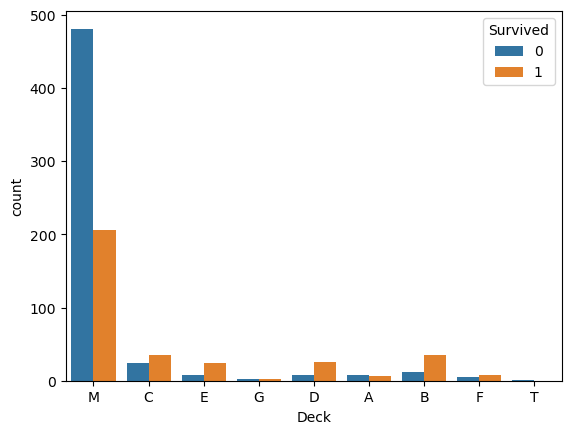

In [302]:
# Deck의 데이터에 따른 생존 사망 바 그래프를 그려보기
# countplot : 범주형 데이터의 빈도 수를 차트 바로 표시
# hue 컬럼을 기준으로 색상을 구분
sns.countplot(data = train, x='Deck', hue = 'Survived')

plt.show()

- M에서 상대적으로 사람이 많이 죽었다. 
- 생존여부 판단에 활용해도 괜찮겠다.

### Pclass 시각화

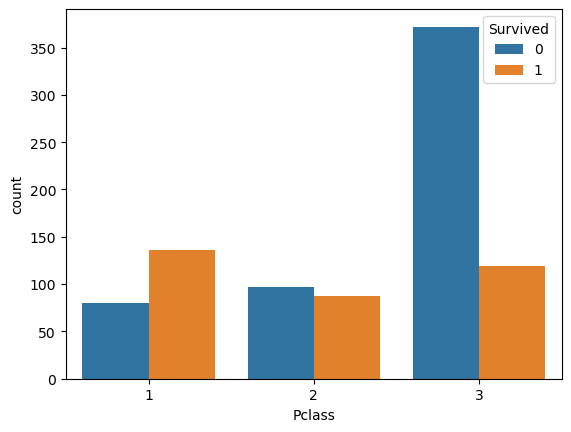

In [303]:
# Pclass에 다른 생존 여부 빈도 수를 차트 바로 시각화하기
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')
plt.show()

- 3등급의 사람들이 많이 죽었다.

### Deck과 Pclass 시각화

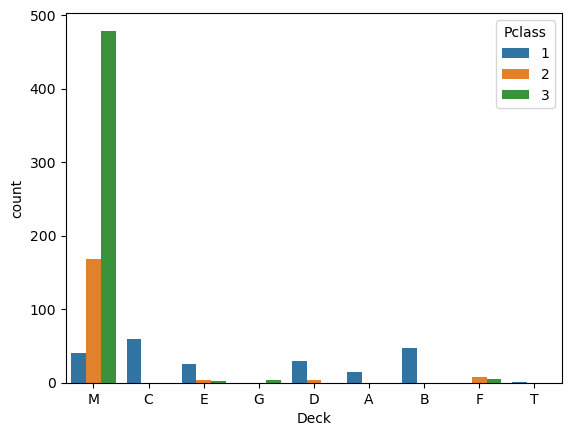

In [304]:
sns.countplot(data=train, x = 'Deck', hue = 'Pclass')
plt.show()

### 예제 

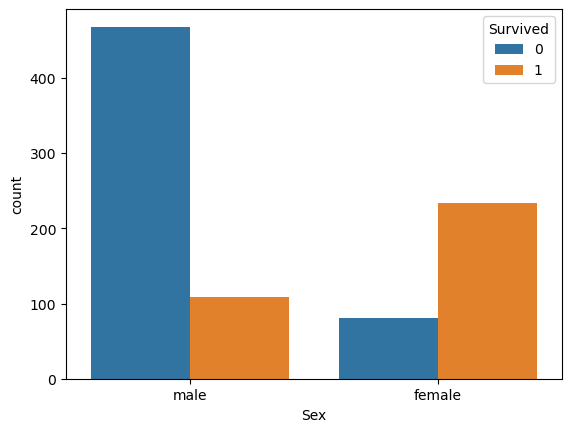

In [305]:
# 성별에 따른 생존 빈도를 바 차트로 시각화하기

sns.countplot(data=train, x='Sex', hue='Survived')
plt.show()

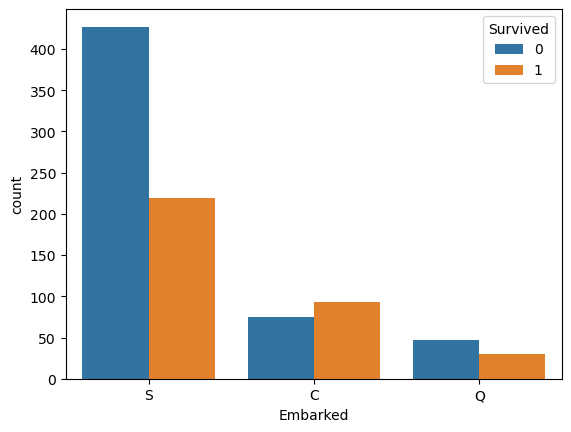

In [306]:
# 승선항에 따른 생존빈도를 시각화해보자
sns.countplot(data=train, x='Embarked', hue = 'Survived')
plt.show()

### 수치형 데이터

1. Age 시각화

In [307]:
train[train['Age'] > 80]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
PassengerId,,,,,,,,,,,


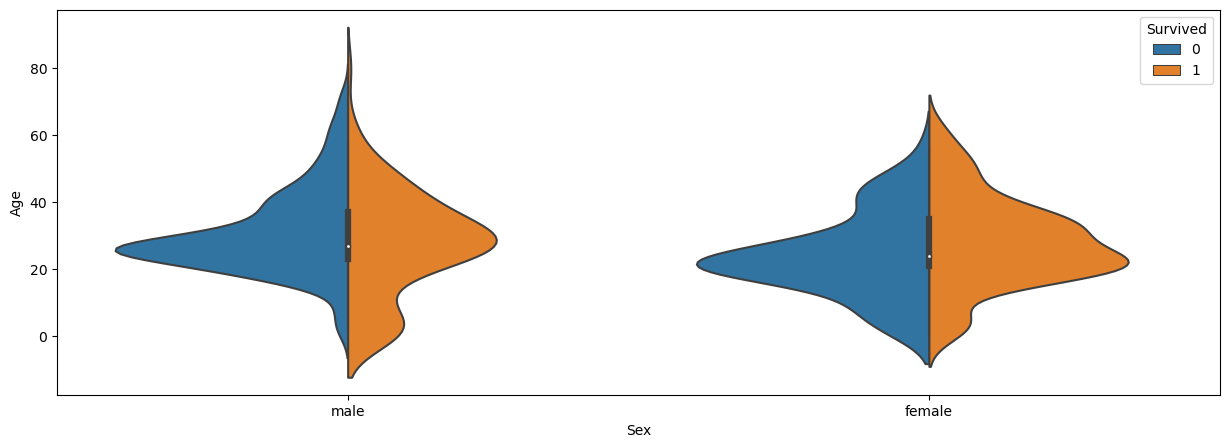

In [308]:
# violinplot 이라는 그래프 그려보기
plt.figure(figsize = (15,5))
sns.violinplot(data=train,
              x = 'Sex',
              y = 'Age',
              hue = 'Survived',
              split = True)
# plt.ylim(0,80)

plt.show()

- 20~40대 사이가 사망률이 가장 높게 나타나고
- 어린아이 중에서는 남자아이가 여자아이에 비해 많이 생존하였다.

2. Fare 시각화

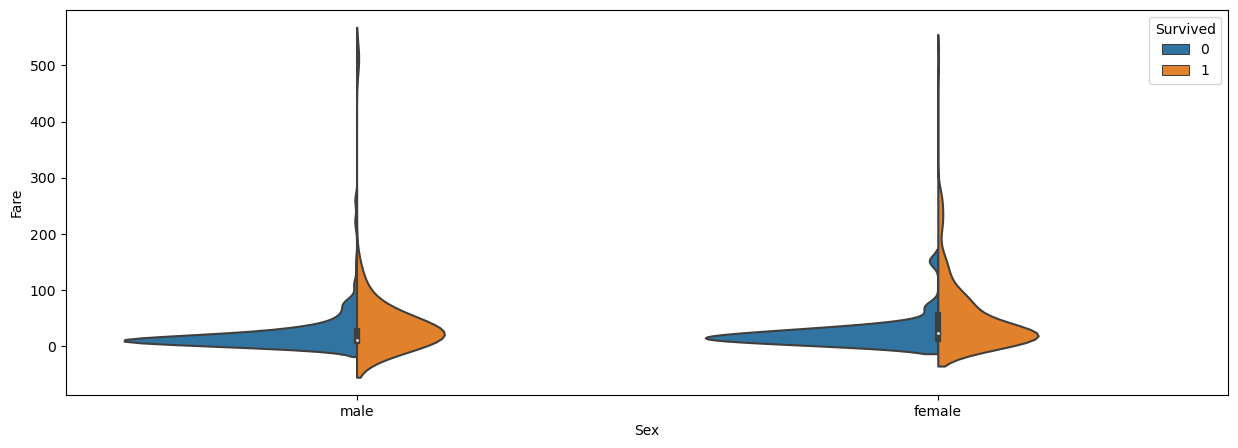

In [309]:
# violinplot 그리기
# x = 'Sex', y = 'Fare', hue= 'Survived'
plt.figure(figsize = (15,5))
sns.violinplot(data = train,
              x = 'Sex',
              y = 'Fare',
              hue = 'Survived',
              split = True)
plt.show()

- 요금이 저렴한 사람은 상대적으로 생존율이 낮다.

### Parch, SibSp - 부모자식, 형제배우자
- 특성공학 : Parch와 SibSp를 더해서 가족의 숫자라는 새로운 컬럼 생성 

In [310]:
# Family_Size 라는 새로운 컬럼을 생성
# Parch와 SibSp을 더한 값을 Family_Size에 담기
train['Family_Size'] = train['Parch'] + train['SibSp']+1
test['Family_Size'] = test['Parch'] + test['SibSp']+1

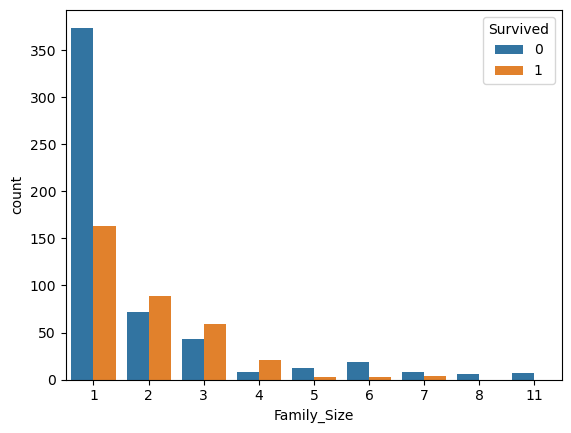

In [311]:
# Family_Size에 따른 생존 빈도 수를 시각화해보자
sns.countplot(data=train, x = 'Family_Size', hue = 'Survived')
plt.show()

- 1명일 때는 사망 비율이 높고, 2~4인 경우 생존 비율이 높고 5명이상인 경우 사망 비율이 높다. 
- binnig(사소한 관찰오류의 영향을 줄여줄 수 있다.)

- 가족사이즈가 1이면 Alone, 2~4이면 Small, 5이상이면 Large

In [312]:
# 카테고리화 함수 pd.cut
bins = [0,1,4,11]  # 범위지정
labels = ['Alone', 'Small', 'Large']  # 라벨지정
train['Family_Group'] = pd.cut(train['Family_Size'], bins=bins, labels = labels)
test['Family_Group'] = pd.cut(test['Family_Size'], bins = bins, labels=labels)

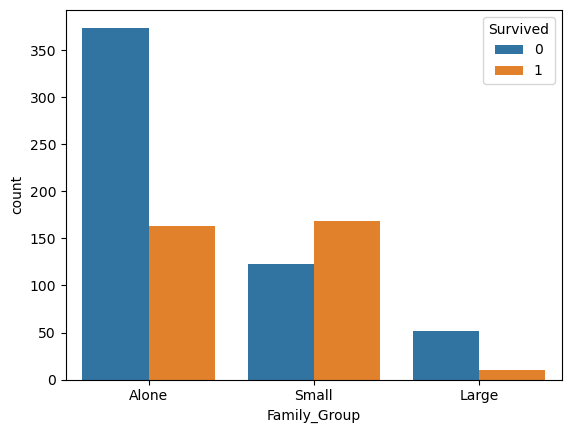

In [313]:
# Family_Group에 따른 생존 빈도 수를 시각화하기
sns.countplot(data=train, x = 'Family_Group', hue = 'Survived')
plt.show()

### Text 데이터 다루기

1. Name 시각화 
- 중간 호칭만 추출하자

In [314]:
# 해당 데이터에서 'Mr'호칭만 추출하기
train['Name'][1].split(',')[1].split('.')[0].strip()

'Mr'

In [315]:
# 중간 호칭을 추출해주는 함수 정의 
def split_title(row):
    """이름의 중간 호칭을 리턴"""
    return row.split(',')[1].split('.')[0].strip()

In [316]:
# apply 메서드 활용하기
# 시리즈 자료형이기 때문에 axis 축 설정 X
# 'Title' 새로운 컬럼을 생성하여 해당 값을 대입
train['Title'] = train['Name'].apply(split_title)
test['Title'] = test['Name'].apply(split_title)

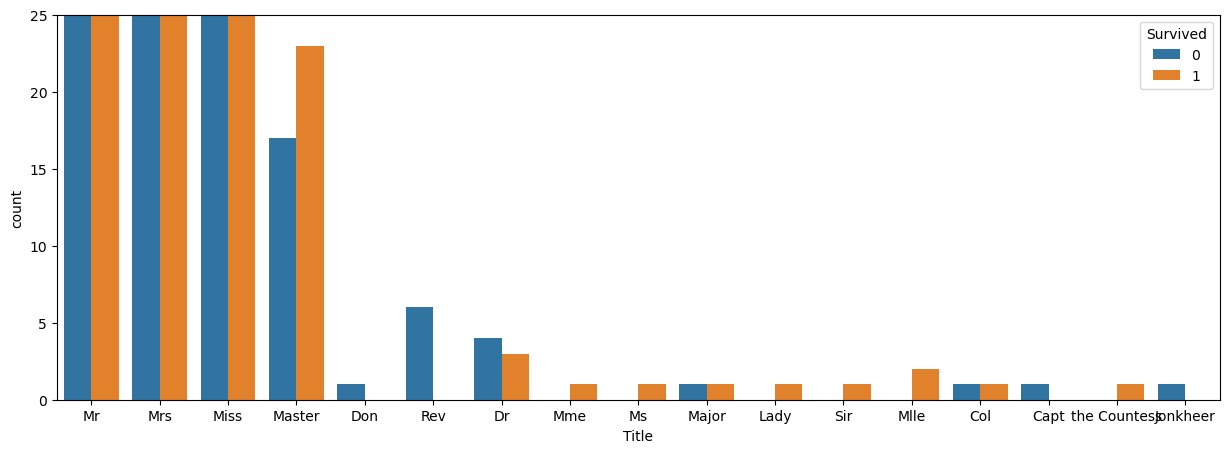

In [317]:
# 중간 호칭별로 생존 빈도수를 막대그래프로 시각화
plt.figure(figsize=(15,5))
sns.countplot(data = train, x = 'Title', hue = 'Survived')
plt.ylim(0,25)
plt.show()

- Master : 결혼하지 않은 남성. 주로 청소년 이하
- Rev : 목사님 (6명 모두 사망)
- Mr, Mrs, Miss, Master, Rev , Other(나머지)

In [318]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [319]:
title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Don',  'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']

In [320]:
len(title)

17

In [321]:
conver_title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev'] + ['Other'] *12
conver_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [322]:
title_dict = dict(zip(title, conver_title))
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other'}

In [238]:
# test도 map 활용하여 데이터 변경 후 
# unique 중복 값 없이 데이터 확인

In [323]:
train['Title'].map(title_dict).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [324]:
train['Title'] = train['Title'].map(title_dict)

In [325]:
# 딕셔너리에서 key에는 'Dona' 라는 값 value에는 'Other' 값 추가
title_dict['Dona'] = 'Other'

title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other',
 'Dona': 'Other'}

In [327]:
test['Title'].map(title_dict).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [328]:
test['Title']=test['Title'].map(title_dict)

In [329]:
# train과 test에서 Name 컬럼 삭제하기
# drop 메서드 사용
train.drop('Name', axis = 1, inplace = True)

In [330]:
test.drop('Name', axis = 1, inplace = True)

### 티켓 
- 분석하기에 의미있는 데이터로 보기 어려움 
- 컬럼 삭제하기

In [331]:
train['Ticket'].head()

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: object

In [332]:
# train과 test 데이터 Ticket 컬럼 삭제하기

train.drop('Ticket', axis = 1, inplace =True)
test.drop('Ticket', axis = 1, inplace =True)

In [333]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int32   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int32   
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    object  
 8   Deck          891 non-null    object  
 9   Family_Size   891 non-null    int64   
 10  Family_Group  891 non-null    category
 11  Title         891 non-null    object  
dtypes: category(1), float64(1), int32(2), int64(4), object(4)
memory usage: 109.9+ KB


### 범주형 데이터 인코딩

In [334]:
# X_train(훈련용 문제)  / y_train(훈련용 답) / X_test (테스트용 문제)
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']
X_test = test

In [335]:
# X_train 원핫인코딩 진행하기
# pd.get_dummies() 메소드 활용
X_train = pd.get_dummies(X_train)

In [336]:
# X_test 원핫인코딩 진행 
X_test = pd.get_dummies(X_test)

In [337]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22,1,0,7.2500,2,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,38,1,0,71.2833,2,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,3,26,0,0,7.9250,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,35,1,0,53.1000,2,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,3,35,0,0,8.0500,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [338]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_M,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,0,0,7.8292,1,0,1,0,1,...,1,1,0,0,0,0,1,0,0,0
893,3,47,1,0,7.0000,2,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
894,2,62,0,0,9.6875,1,0,1,0,1,...,1,1,0,0,0,0,1,0,0,0
895,3,27,0,0,8.6625,1,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
896,3,22,1,1,12.2875,3,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [339]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Deck_T', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [340]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Family_Group_Alone', 'Family_Group_Small', 'Family_Group_Large',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'Title_Rev'],
      dtype='object')

In [341]:
# 컬럼의 차이를 확인하는 방법
# 집합함수 set() - 차집합

set(X_train.columns) - set(X_test.columns)

{'Deck_T'}

In [342]:
X_test['Deck_T'] = 0

In [343]:
set(X_train.columns) - set(X_test.columns)

set()

In [344]:
print(X_train.shape)
print(X_test.shape)

(891, 29)
(418, 29)
